In [1]:
import pandas as pd

In [2]:
from urllib.request import urlretrieve

In [3]:
covid_df= pd.read_csv('italy-covid-daywise.csv')

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [6]:
covid_df.at[243,'new_cases']

np.float64(1444.0)

Total no of cases and deaths

In [43]:
total_cases=covid_df.new_cases.sum()
total_deaths=covid_df.new_deaths.sum()

In [47]:
covid_df['total_cases']=covid_df.new_cases.sum()

In [49]:
covid_df['total_deaths']=covid_df.new_deaths.sum()

In [50]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,2019-12-31,1,271515.0,35497.0
1,2020-01-01,0.0,0.0,NaN,2020,1,2020-01-01,2,271515.0,35497.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2020-01-02,3,271515.0,35497.0
3,2020-01-03,0.0,0.0,NaN,2020,1,2020-01-03,4,271515.0,35497.0
4,2020-01-04,0.0,0.0,NaN,2020,1,2020-01-04,5,271515.0,35497.0
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,2020-08-30,6,271515.0,35497.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,2020-08-31,0,271515.0,35497.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,2020-09-01,1,271515.0,35497.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2020-09-02,2,271515.0,35497.0


In [8]:
print('number of reported cases is {} and number of death is {}'.format(total_cases, total_deaths))

number of reported cases is 271515.0 and number of death is 35497.0


In [9]:
print(f'number of reported cases is {total_cases} and number of death is {total_deaths}')

number of reported cases is 271515.0 and number of death is 35497.0


Death Rate

In [10]:
death_rate= (covid_df.new_deaths.sum()/covid_df.new_cases.sum())*100

In [11]:
print('the total death rate is {:.3f}%'.format(death_rate))

the total death rate is 13.074%


Q. what is the total no of test conducted ? a total of 935310 test were conducted before daily test numbers were being reported

In [12]:
initial_test=935310
total_test= initial_test+covid_df.new_tests.sum()

In [13]:
total_test

np.float64(5214766.0)

In [14]:
positive_rate=(total_cases / total_test)*100

In [15]:
print('{:.2f}% of test digaonised as positive.'.format(positive_rate))

5.21% of test digaonised as positive.


SORTING DATA 

In [16]:
high_new_cases= covid_df.new_cases>1000

In [17]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [18]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [19]:
from IPython.display import display
with pd.option_context('display.max_rows',100):
    display(covid_df[high_new_cases])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [20]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [21]:
covid_df['positivity_rate']=covid_df.new_cases / covid_df.new_tests

In [22]:
covid_df

,date,new_cases,new_deaths,new_tests,positivity_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [23]:
covid_df.drop(columns=['positivity_rate'], inplace=True)


In [24]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [25]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [26]:
covid_df['date']= pd.to_datetime(covid_df.date)

In [27]:
covid_df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Date Time 

In [28]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month']= pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).date
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [29]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,2019-12-31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,2020-01-01,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2020-01-02,3
3,2020-01-03,0.0,0.0,NaN,2020,1,2020-01-03,4
4,2020-01-04,0.0,0.0,NaN,2020,1,2020-01-04,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,2020-08-30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,2020-08-31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,2020-09-01,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2020-09-02,2


In [30]:
covid_df_may = covid_df[covid_df.month==5]

In [31]:
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,2020-05-01,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2020-05-02,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,2020-05-03,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,2020-05-04,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,2020-05-05,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,2020-05-06,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,2020-05-07,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,2020-05-08,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,2020-05-09,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,2020-05-10,6


In [32]:
covid_df_may_matrices = covid_df_may[['new_cases' , 'new_deaths' , 'new_tests']]

In [33]:
covid_df_may_matrices

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [34]:
covid_may_totals= covid_df_may_matrices.sum() 

In [35]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [36]:
covid_df[covid_df.month==5][['new_cases' , 'new_deaths' , 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

GROUPING

MONTHWISE

In [37]:
covid_month_df=covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()

In [38]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [39]:
covid_month_df.loc[7]

new_cases       6722.0
new_deaths       388.0
new_tests     797692.0
Name: 7, dtype: float64

In [40]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()

In [41]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


WRITTING DATA

In [53]:

result_df = covid_df[['date','new_cases','total_cases','new_deaths','new_tests']]

In [54]:
result_df

,date,new_cases,total_cases,new_deaths,new_tests
0,2019-12-31,0.0,271515.0,0.0,NaN
1,2020-01-01,0.0,271515.0,0.0,NaN
2,2020-01-02,0.0,271515.0,0.0,NaN
3,2020-01-03,0.0,271515.0,0.0,NaN
4,2020-01-04,0.0,271515.0,0.0,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,271515.0,1.0,53541.0
244,2020-08-31,1365.0,271515.0,4.0,42583.0
245,2020-09-01,996.0,271515.0,6.0,54395.0
246,2020-09-02,975.0,271515.0,8.0,NaN


In [61]:
result_df.to_csv('results.csv', index=None)

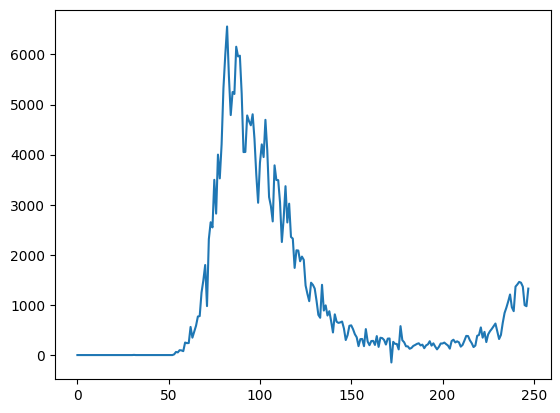

In [66]:
result_df.new_cases.plot();

<Axes: >

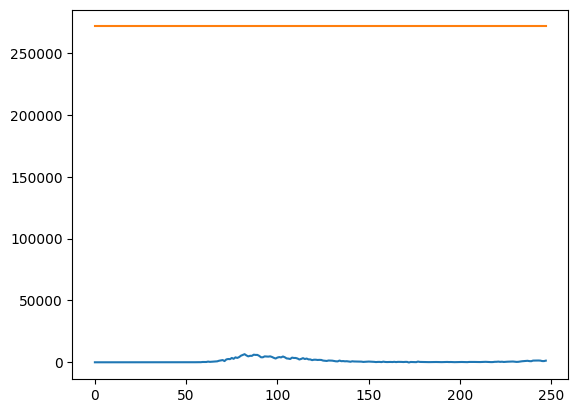

In [67]:
result_df.new_cases.plot()
result_df.total_cases.plot()


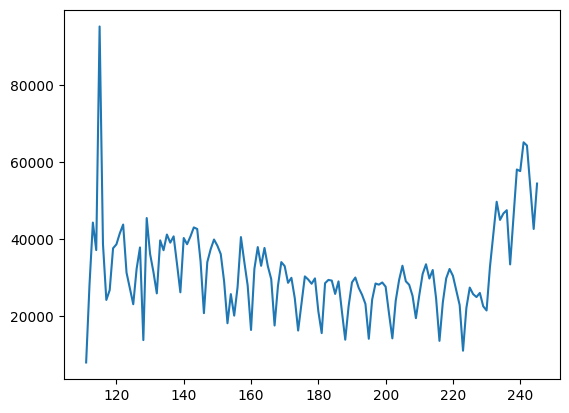

In [70]:
result_df.new_tests.plot();